
=== Timetable Solutions ===
Backtracking + Heuristics: {('T1', 'Math'): ('Mon9', 'R1'), ('T2', 'Physics'): ('Mon10', 'R1'), ('T3', 'CS'): ('Tue9', 'R1')}
Backtracking + Forward Checking: {('T1', 'Math'): ('Mon9', 'R1'), ('T2', 'Physics'): ('Mon10', 'R1'), ('T3', 'CS'): ('Tue9', 'R1')}

=== Performance Comparison ===
Method                              Time(s)    Nodes      Backtracks
Backtracking + Heuristics           0.0001     4          0         
Backtracking + Forward Checking     0.0001     4          0         


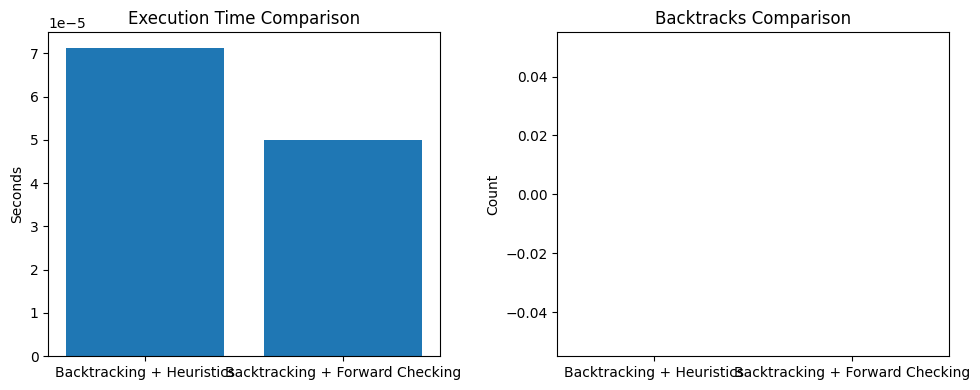

In [3]:
import random
import time
import itertools
import matplotlib.pyplot as plt

# Problem Definition

teachers = ["T1", "T2", "T3"]
subjects = ["Math", "Physics", "CS"]
rooms = ["R1", "R2"]
times = ["Mon9", "Mon10", "Tue9", "Tue10"]

# Each teacher teaches one subject
teacher_subject = {"T1": "Math", "T2": "Physics", "T3": "CS"}


# Utility Functions

def is_consistent(assignment, var, value):
    """Check if assigning value to var is consistent with current assignment."""
    for other_var, other_val in assignment.items():
        # If same time slot or same room, conflict
        if other_val[0] == value[0] and other_val[1] == value[1]:
            return False
        # If same teacher at same time, conflict
        if other_var[0] == var[0] and other_val[0] == value[0]:
            return False
    return True


# Backtracking Search

def backtracking(variables, domains, assignment, order_vars=True, order_vals=True, forward_check=False):
    if len(assignment) == len(variables):
        return assignment, 1, 0

    # Variable Ordering: Minimum Remaining Values (MRV)
    if order_vars:
        unassigned = [v for v in variables if v not in assignment]
        var = min(unassigned, key=lambda v: len(domains[v]))
    else:
        var = [v for v in variables if v not in assignment][0]

    backtracks = 0
    nodes = 1

    # Value Ordering: Least Constraining Value
    if order_vals:
        def lcv(value):
            return sum(is_consistent(assignment, v, value) for v in variables)
        domain = sorted(domains[var], key=lcv, reverse=True)
    else:
        domain = domains[var]

    for value in domain:
        if is_consistent(assignment, var, value):
            local_assignment = assignment.copy()
            local_assignment[var] = value

            local_domains = {v: list(domains[v]) for v in domains}
            if forward_check:
                for v in domains:
                    if v not in local_assignment:
                        local_domains[v] = [val for val in local_domains[v] if is_consistent(local_assignment, v, val)]

            result, n, b = backtracking(variables, local_domains, local_assignment, order_vars, order_vals, forward_check)
            nodes += n
            backtracks += b

            if result:
                return result, nodes, backtracks
        backtracks += 1
    return None, nodes, backtracks



# Setup and Run CSP

def create_problem():
    variables = [(t, teacher_subject[t]) for t in teachers]
    domain = [(time, room) for time in times for room in rooms]
    domains = {v: domain.copy() for v in variables}
    return variables, domains


def run_experiment():
    results = []

    # Case 1: Backtracking with heuristics
    vars, doms = create_problem()
    start = time.time()
    sol1, nodes1, back1 = backtracking(vars, doms, {}, order_vars=True, order_vals=True, forward_check=False)
    t1 = time.time() - start

    # Case 2: Backtracking with Forward Checking
    vars, doms = create_problem()
    start = time.time()
    sol2, nodes2, back2 = backtracking(vars, doms, {}, order_vars=True, order_vals=True, forward_check=True)
    t2 = time.time() - start

    results.append(("Backtracking + Heuristics", t1, nodes1, back1))
    results.append(("Backtracking + Forward Checking", t2, nodes2, back2))

    # Display Results
    print("\n=== Timetable Solutions ===")
    print("Backtracking + Heuristics:", sol1)
    print("Backtracking + Forward Checking:", sol2)
    print("\n=== Performance Comparison ===")
    print("{:<35} {:<10} {:<10} {:<10}".format("Method", "Time(s)", "Nodes", "Backtracks"))
    for r in results:
        print("{:<35} {:<10.4f} {:<10} {:<10}".format(*r))

    # Plot comparison
    labels = [r[0] for r in results]
    times = [r[1] for r in results]
    backs = [r[3] for r in results]

    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    plt.bar(labels, times)
    plt.title("Execution Time Comparison")
    plt.ylabel("Seconds")

    plt.subplot(1,2,2)
    plt.bar(labels, backs)
    plt.title("Backtracks Comparison")
    plt.ylabel("Count")

    plt.tight_layout()
    plt.show()


# =============================
# Main
# =============================
if __name__ == "__main__":
    run_experiment()

